To Analyze the data and generate insights that could help Netlix in deciding which type of
shows/movies to produce and how they can grow the business in different countries


URL to access colab file:
https://colab.research.google.com/drive/1E-PT4dJn8h0bzBOBMaAWsHHkfViPqRve?usp=sharing

###Defining Problem Statement and Analysing basic metrics

##Importing libraries which we need

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wn

Supressing the warnings or future deprecation messages

In [ ]:
wn.filterwarnings('ignore')

###loading the netflix data set with read_csv

In [ ]:
netflix_data = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv')

In [ ]:
netflix_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


Netflix data has total 8807 titles with 12 columns. We can see there are
NaN values in some columns


##Observations on the shape of data, data types of all  the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary

###shape of dataset

In [ ]:
netflix_data.shape

(8807, 12)

###Data types of all attributes

In [ ]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


###Missing value detection in columns with isna

In [ ]:
netflix_data.isna().sum(axis=0)

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

####We can seen there are total 2634 missing values in director column, 825 missing values in cast, 831 missing values in country, 10 missing values in date_added ,4 missing values rating and 3 missing values in duration.

###Filling the missing values with unknown

In [ ]:
netflix_data.director.fillna("unknown_director", inplace=True)
netflix_data.cast.fillna("unknown_cast", inplace=True)
netflix_data.country.fillna("unknown_country", inplace=True)

For missing values, the simplest way to clean data would be to delete the rows with the missing data. But this will create a loss of information.
Since "director", "cast", and "country" contain the majority of null values, we chose to treat each missing value is unknown values. Other columns we will drop from data set like "date_added” and "rating" contain an insignificant portion of the data.


In [ ]:
netflix_data.dropna(subset=['date_added','rating','duration'],inplace=True)

Checking null values after cleaning the data set

In [ ]:
netflix_data.isna().sum(axis=0)

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Un-nesting the columns

Lets creating a copy of original dataset before reshaping the data

In [ ]:
df = netflix_data.copy()

Convert the cast,country,directors columns strings to lists

In [ ]:
netflix_data[['cast','country','director']] = netflix_data[['cast','country','director']].apply(lambda x: x.str.split(','),axis=1)

In [ ]:
netflix_data = netflix_data.explode('cast',ignore_index =True)

In [ ]:
netflix_data = netflix_data.explode('director',ignore_index =True)

Droping rows having empty country

In [ ]:
k = netflix_data.country

In [ ]:
sum(sum(j=='' for j in i) for i in k)

45

We have seen there are 45 empty spaced values in country lists which got added after spliting the strings of country list columns. Possibly original data have empty spaced values.

In [ ]:
netflix_data = netflix_data.explode('country',ignore_index =True)

Removing the empty spaced country values from data set

In [ ]:
netflix_data.drop(index = np.where(netflix_data.country == '')[0],inplace = True)

Currently we hold un-nesting task on listed_in column. We will unnest the listed-in column if its required in future.

In [ ]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89260 entries, 0 to 89304
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       89260 non-null  object
 1   type          89260 non-null  object
 2   title         89260 non-null  object
 3   director      89260 non-null  object
 4   cast          89260 non-null  object
 5   country       89260 non-null  object
 6   date_added    89260 non-null  object
 7   release_year  89260 non-null  int64 
 8   rating        89260 non-null  object
 9   duration      89260 non-null  object
 10  listed_in     89260 non-null  object
 11  description   89260 non-null  object
dtypes: int64(1), object(11)
memory usage: 8.9+ MB


##Find the counts of each categorical variable both using graphical and non-graphical analysis.

###Non - Graphical Analysis

In [ ]:
data_copy = netflix_data.copy()

Lets unlist the listed_in for counting based on genre

In [ ]:
netflix_data['listed_in'] = netflix_data['listed_in'].str.split(',')

In [ ]:
netflix_data = netflix_data.explode('listed_in',ignore_index =True)

In [ ]:
def count_categories(x):
  return x.value_counts()

In [ ]:
netflix_data['listed_in'].str.strip().value_counts()

Dramas                          29760
International Movies            28203
Comedies                        20829
International TV Shows          12811
Action & Adventure              12216
Independent Movies               9826
Children & Family Movies         9771
TV Dramas                        8929
Thrillers                        7107
Romantic Movies                  6412
TV Comedies                      4907
Crime TV Shows                   4715
Horror Movies                    4571
Kids' TV                         4555
Sci-Fi & Fantasy                 4037
Music & Musicals                 3077
Romantic TV Shows                3049
Documentaries                    2407
TV Action & Adventure            2278
Anime Series                     2273
Spanish-Language TV Shows        2118
British TV Shows                 1799
Sports Movies                    1531
Classic Movies                   1434
TV Mysteries                     1281
Korean TV Shows                  1122
Cult Movies 

'Dramas' Genre is majority in netflix data while 'Science & Nature TV' Genre are least count

In [ ]:
netflix_data.drop_duplicates(subset=['show_id','director'],keep='first')['director'].str.strip().value_counts()

unknown_director    2621
Rajiv Chilaka         22
Jan Suter             21
Raúl Campos           19
Marcus Raboy          16
                    ... 
Raymie Muzquiz         1
Stu Livingston         1
Joe Menendez           1
Eric Bross             1
Mozez Singh            1
Name: director, Length: 4992, dtype: int64

Rajiv Chilaka directed more titles in netflix.

In [ ]:
netflix_data.drop_duplicates(subset=['show_id'],keep='first')['type'].value_counts()

Movie      6126
TV Show    2664
Name: type, dtype: int64

Movies count is trice higher comparing to TV shows in netflix. It shows netflix focus more on movies comparing to TV shows

We have to drop duplicates by treating show_id and country as index

In [ ]:
netflix_data.drop_duplicates(subset=['show_id','country'],keep='first')['country'].str.strip().value_counts()

United States      3681
India              1046
unknown_country     829
United Kingdom      805
Canada              445
                   ... 
Bermuda               1
Ecuador               1
Armenia               1
Mongolia              1
Montenegro            1
Name: country, Length: 123, dtype: int64

United states has higher available titles comparing to other countries

In [ ]:
netflix_data.drop_duplicates(subset=['show_id'],keep='first')['rating'].str.strip().value_counts()

TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

Netflix has more Mature Adult category content , under 14 years restricted content as second highest and 3 unrated content is available in netflix.

###Graphical Analysis

Lets plot the Genre type

In [ ]:
x_data = netflix_data['listed_in'].str.strip().value_counts().index
y_data = netflix_data['listed_in'].str.strip().value_counts().values


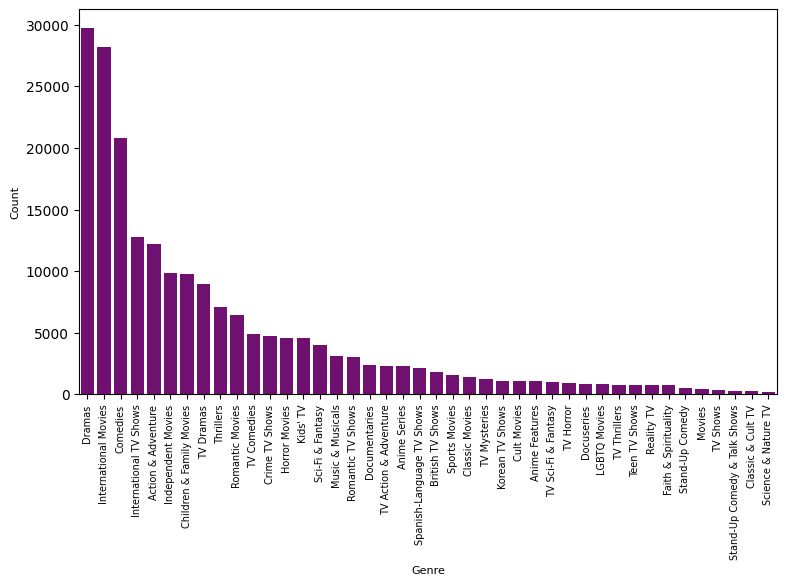

In [ ]:
plt.figure(figsize=(9,5))
plt.xticks(rotation=90,fontsize=7)
sns.barplot(x = x_data,y = y_data,color = 'purple')
plt.xlabel('Genre',fontsize=8)
plt.ylabel('Count',fontsize=8)
plt.show()

Dramas , International Movies & comedies has highest percent contribution in netflix

In [ ]:
x_data = netflix_data.drop_duplicates(subset=['show_id','director'],keep='first')['director'].str.strip().value_counts().index
y_data = netflix_data.drop_duplicates(subset=['show_id','director'],keep='first')['director'].str.strip().value_counts().values

In [ ]:
x_data.size

4992

limiting the data to top 10 as its has 4404 directors and removing the unknown values

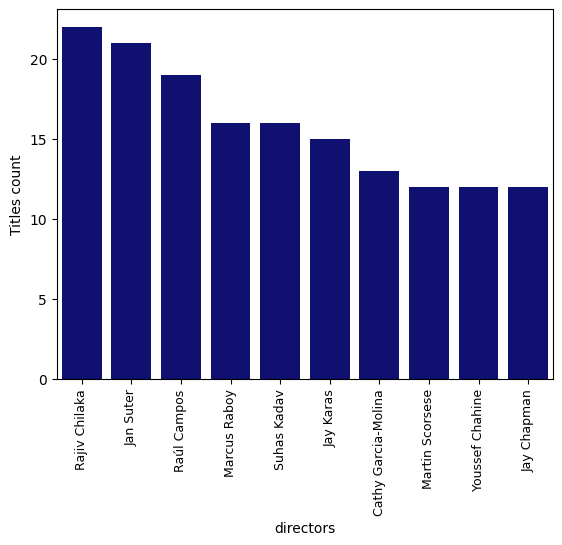

In [ ]:
sns.barplot(x=x_data[1:11],y =y_data[1:11], color = 'navy')
plt.xticks(rotation = 90, fontsize = 9)
plt.xlabel('directors')
plt.ylabel('Titles count')
plt.show()

Rajiv chilaka title counts have high in netflix comparing to other directors titles count

In [ ]:
pie_data = netflix_data.drop_duplicates(subset=['show_id'],keep='first')['type'].value_counts()

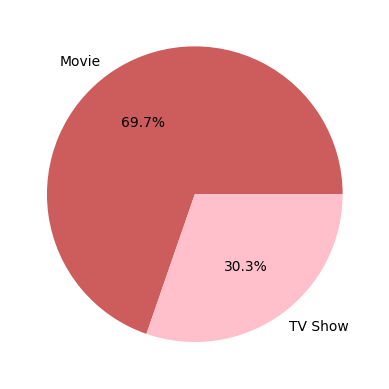

In [ ]:
g=plt.pie(pie_data,labels=pie_data.index, colors = ['indianred','pink'],autopct="%1.1f%%")

It shows netflix has more Movies compared to TV shows

In [ ]:
x_data = netflix_data.drop_duplicates(subset= ['show_id','country'])['country'].str.strip().value_counts().index
y_data = netflix_data.drop_duplicates(subset= ['show_id','country'])['country'].str.strip().value_counts().values

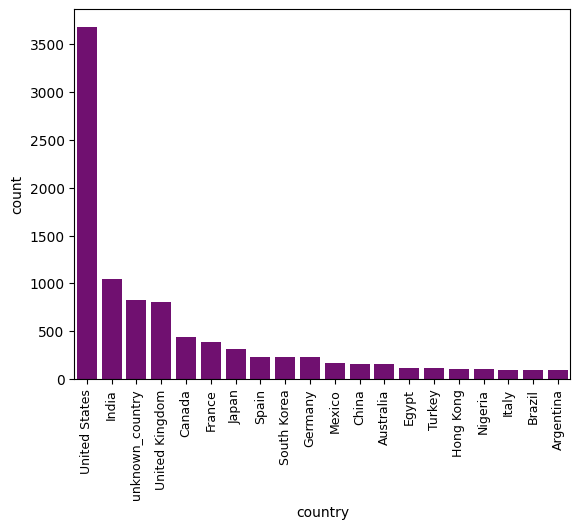

In [ ]:
sns.barplot(x=x_data[:20],y =y_data[0:20], color = 'purple')
plt.xticks(rotation = 90, fontsize = 9)
plt.xlabel('country')
plt.ylabel('count')
plt.show()

United states has high titles count

In [ ]:
x_data = netflix_data.drop_duplicates(subset=['show_id'],keep='first')['rating'].str.strip().value_counts().index
y_data = netflix_data.drop_duplicates(subset=['show_id'],keep='first')['rating'].str.strip().value_counts().values

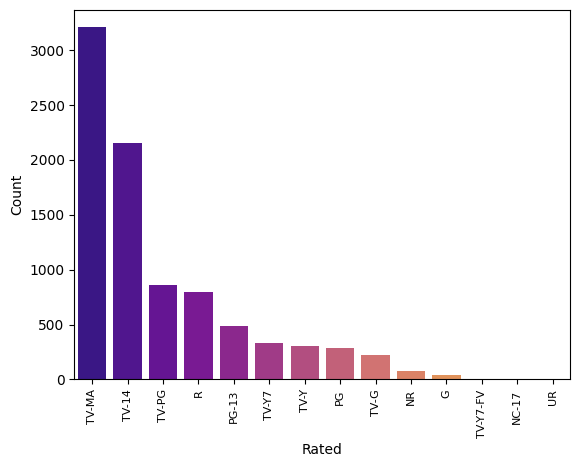

In [ ]:
wn.filterwarnings( "ignore", module = "matplotlib\..*" )
plt.xlabel('Rated')
plt.ylabel('Count')
plt.xticks(rotation = 90, fontsize = 8)
sns.barplot(x= x_data,y= y_data,palette = 'plasma')
plt.show()

Netflix has higher mature content almost 3300 titles as categorised as Mature Adults

##Comparison of tv shows vs. movies.

###Find the number of movies and TV shows produced in each country and pick the top 10 countries.

In [ ]:
movie_data = netflix_data.loc[netflix_data.type == 'Movie'].drop_duplicates(subset=['show_id','country'],keep='first').reset_index(drop=True)
tvshow_data = netflix_data.loc[netflix_data.type == 'TV Show'].drop_duplicates(subset=['show_id','country'],keep='first').reset_index(drop=True)

Previously we have exploded the netflix data based on country, director, We have dropped the duplicates by considering the show_id, country as index. It will remove all duplicates data. Extracted the top 10 countries data to compare

Setting up the country names by removing the extra spaces

In [ ]:
movie_data.country = movie_data.country.str.strip()
tvshow_data.country = tvshow_data.country.str.strip()

Droping the unknown countries from movies and shows dataset

In [ ]:
movie_data.drop(index = np.where(movie_data.country == 'unknown_country')[0],inplace = True)
tvshow_data.drop(index = np.where(tvshow_data.country == 'unknown_country')[0],inplace = True)

Applying groupby on country name to get number of movies produced in each country

In [ ]:
movie_data =  movie_data.groupby('country').aggregate({'show_id':'count'}).reset_index().rename(columns = {'show_id':'shows_count'})
movie_data = movie_data.sort_values(by='shows_count',ascending = False).set_index('country').iloc[:10]
movie_data.reset_index(inplace=True)

In [ ]:
tvshow_data = tvshow_data.groupby('country').aggregate({'show_id':'count'}).reset_index().rename(columns = {'show_id':'shows_count'})
tvshow_data= tvshow_data.sort_values(by='shows_count',ascending = False).set_index('country').iloc[:10]
tvshow_data.reset_index(inplace=True)

Lets showcase the above results in bar plot

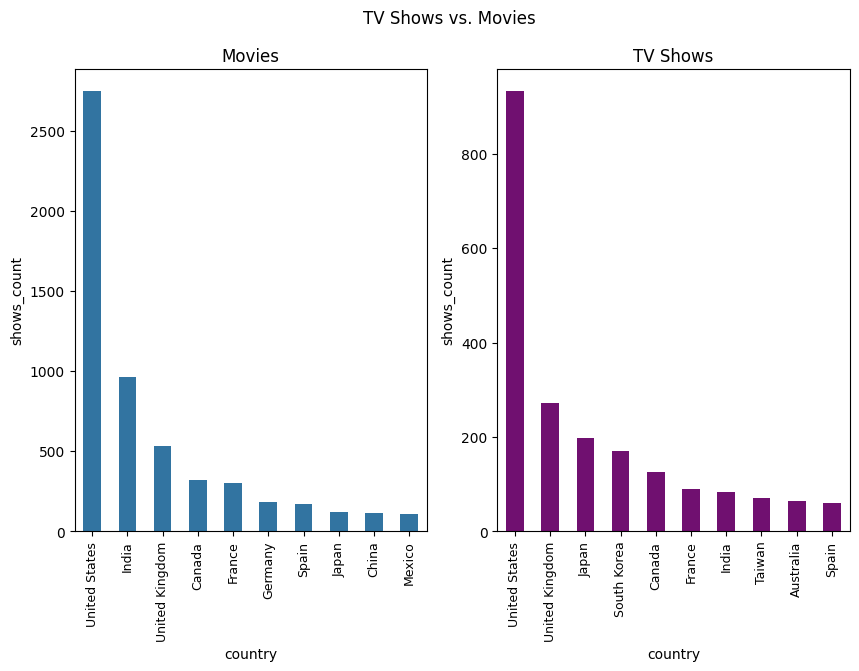

In [ ]:
plt.figure(figsize=(10,6)).suptitle('TV Shows vs. Movies')
plt.subplot(1,2,1)
sns.barplot(data = movie_data, x = 'country', y = 'shows_count',width = 0.5)
plt.title('Movies')
plt.xticks(rotation = 90,fontsize = 9)

plt.subplot(1,2,2)
sns.barplot(data = tvshow_data,x = 'country',y='shows_count',color = 'purple',width = 0.5)
plt.title('TV Shows')
plt.xticks(rotation = 90,fontsize = 9)
plt.show()

We can see the united states leading in production of more titles higher in both TVShows and Movies comparing to other countries.

##What is the best time to launch a TV show?

###Find which is the best week to release the Tv-show or the movie. Do the analysis separately for Tv-shows and Movies

Lets drop the duplicates by considering the show_id as index. It will remove all duplicates data.

In [ ]:
movies_data = df.loc[df.type == 'Movie'].drop_duplicates(subset=['show_id'],keep='first').reset_index(drop=True)
tvshows_data = df.loc[df.type == 'TV Show'].drop_duplicates(subset=['show_id'],keep='first').reset_index(drop=True)

Conversion of date added column to datetime type in both movies and tvshows dataset.

Added the column released week to datasets

In [ ]:
movies_data['released_week'] = pd.to_datetime(movies_data.date_added).dt.week
tvshows_data['released_week'] = pd.to_datetime(tvshows_data.date_added).dt.week

In [ ]:
movie_release_trend = movies_data.groupby('released_week').aggregate({'show_id':'count'}).sort_values(by='show_id', ascending = False)

Lets look for top ten released weeks

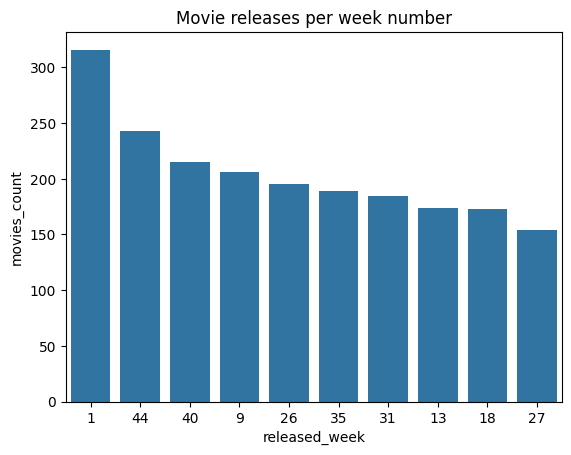

In [ ]:
plt.title('Movie releases per week number')
plt.ylabel('movies_count')
sns.barplot(x = movie_release_trend.index[:10],y = movie_release_trend.show_id[:10],order = movie_release_trend.index[:10])
plt.show()

From above trends we can say that , titles got released on 1st week (Jan 1st week) is more. would be the best time for releases

In [ ]:
tvshows_release_trend = tvshows_data.groupby('released_week').aggregate({'show_id':'count'}).sort_values(by='show_id', ascending = False)

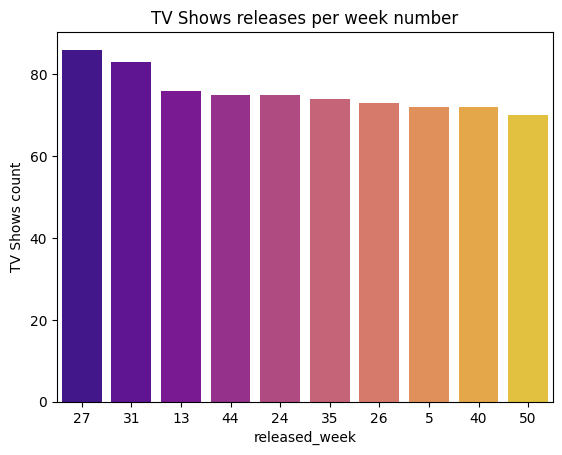

In [ ]:
plt.title('TV Shows releases per week number')
plt.ylabel('TV Shows count')
sns.barplot(x = tvshows_release_trend.index[:10],y = tvshows_release_trend.show_id[:10],order = tvshows_release_trend.index[:10], palette = 'plasma')
plt.show()

From above analysis we can say that titles got released on 27th week is more. There is no significant difference between 27,35,31,44,13,24,5,26 weeks.

###Find which is the best month to release the Tv-show or the movie. Do the analysis separately for Tv-shows and Movies

In [ ]:
df['released_month'] = pd.to_datetime(df.date_added).dt.month_name()

Lets drop the duplicates from data set  and filter based on type category

In [ ]:
movies_mdata = df.loc[df.type == 'Movie'].drop_duplicates(subset=['show_id'],keep='first').reset_index(drop=True)
tvshows_mdata = df.loc[df.type == 'TV Show'].drop_duplicates(subset=['show_id'],keep='first').reset_index(drop=True)

In [ ]:
movies_mdata['released_month'].value_counts()

July         565
April        549
December     547
January      545
October      545
March        528
September    518
August       518
November     498
June         492
May          439
February     382
Name: released_month, dtype: int64

From above data  we can say there is no much sigificant differences on release trends of movies based on months. However if we released on December, November there might be a chances to reach more audience as its more likely festive season if we considered the US country

In [ ]:
tvshows_mdata.released_month.value_counts()

December     265
July         262
September    251
August       236
June         236
October      215
April        214
March        213
November     207
May          193
January      192
February     180
Name: released_month, dtype: int64

From above data we can say there is no much sigificant differences on release trends of movies based on months. However if we released on December, July & November there might be a best to increase the view count and to reach more audience as its more likely festive season if we considered the US country

##Analysis of actors/directors of different types of shows/movies.

###Identify the top 10 directors who have appeared in most movies or TV shows.

Lets drop duplicates from netflix data by considering show_id and director columns as subset. such that it would avoid duplicacy counts

In [ ]:
directors_data = netflix_data.drop_duplicates(subset=['show_id','director'],ignore_index = True)

In [ ]:
directors_data.director = directors_data.director.str.strip()

In [ ]:
directors_data.director.nunique()

4992

Netflix data has 4992 directors. lets reduce the data to top 10 directors

In [ ]:
directors_data.director.value_counts()

unknown_director    2621
Rajiv Chilaka         22
Jan Suter             21
Raúl Campos           19
Marcus Raboy          16
                    ... 
Raymie Muzquiz         1
Stu Livingston         1
Joe Menendez           1
Eric Bross             1
Mozez Singh            1
Name: director, Length: 4992, dtype: int64

As its has more unknown values lets filter out the unknown values

In [ ]:
directors_data = directors_data.loc[~directors_data.director.isin(['unknown_director'])]

In [ ]:
series_data = directors_data.groupby('director')['show_id'].count().sort_values(ascending = False)

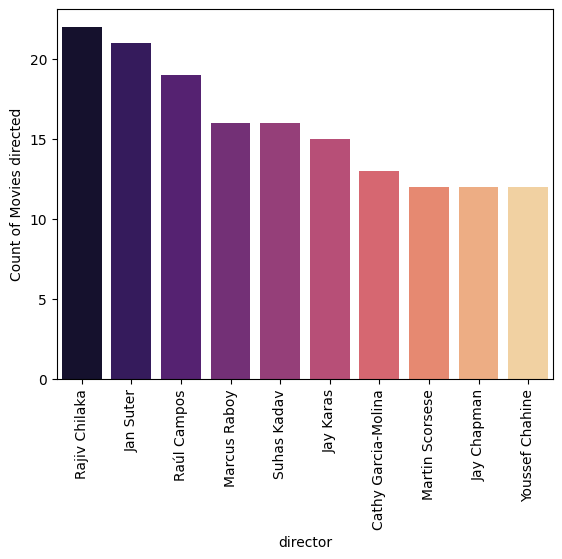

In [ ]:
plt.xticks(rotation = 90,fontsize =10)
plt.ylabel('Count of Movies directed')
sns.barplot(x = series_data.index[:10],y = series_data.values[:10], palette= 'magma' )
plt.show()

Rajiv Chilaka has directed more netflix titles.

Lets look deep by filtering based on titles categories like Movie or TV shows.

In [ ]:
directors_data = directors_data.loc[~directors_data.director.isin(['unknown_director'])]

In [ ]:
(directors_data.type == 'TV Show').sum()

312

In TV Shows directors data theres only 312 rows after droping the duplicates and unknown coloumns

In [ ]:
tvshows_dir_data = directors_data.loc[directors_data.type.isin(['TV Show'])].reset_index(drop=True)

In [ ]:
tvshows_dir_data.groupby('director')['show_id'].count().sort_values(ascending = False)

director
Ken Burns              3
Alastair Fothergill    3
Stan Lathan            2
Jung-ah Im             2
Joe Berlinger          2
                      ..
Hong Won-ki            1
Hiroyuki Seshita       1
Hikaru Toda            1
Hernán Guerschuny      1
Ziad Doueiri           1
Name: show_id, Length: 299, dtype: int64

After we removed the duplicacy records and Nan values. the most directed titles as from Alastair Fothergill and Ken Burns with max_value as 3

Lets check for the Movies category data

In [ ]:
movie_dir_data = directors_data.loc[directors_data.type.isin(['Movie'])].reset_index(drop=True)

In [ ]:
movie_dir_data.shape

(6662, 12)

In [ ]:
movie_dir_data.groupby('director')['show_id'].count().sort_values(ascending = False)

director
Rajiv Chilaka       22
Jan Suter           21
Raúl Campos         19
Suhas Kadav         16
Marcus Raboy        15
                    ..
José Ortuño          1
Bob Persichetti      1
Jovanka Vuckovic     1
Bob Odenkirk         1
Mary Lambert         1
Name: show_id, Length: 4775, dtype: int64

From above anaylsis, Rajiv Chilaka has directed more movies (22 movies). Raúl Campos  as second leading director with count of 18 movies.

Rajiv Chilaka has not directed any TV shows. and Alastair Fothergill has not directed any Movies

##Which genre movies are more popular or produced more

Lets import workcloud and other required libraries

In [ ]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS

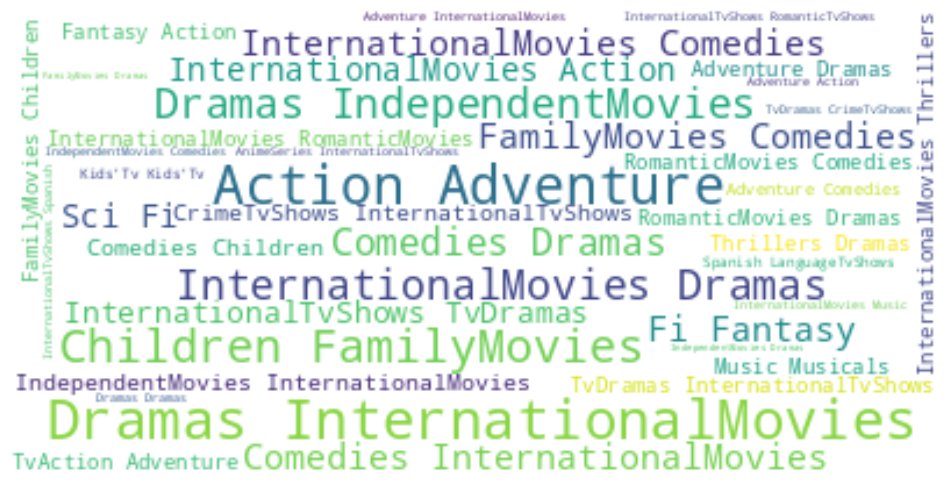

In [ ]:
text = " ".join(i.strip().title().replace(' ','') for i in netflix_data.listed_in)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

From Above pictoral representation, its shows most Genre movies are from ,

*   International movies
*   Dramas
*   comedies
*   Action
*   Adventure
*   Children FamilyMovies


lets look in non graphical representation of most genre

In [ ]:
netflix_data['listed_in'].str.strip().value_counts()

Dramas                          29760
International Movies            28203
Comedies                        20829
International TV Shows          12811
Action & Adventure              12216
Independent Movies               9826
Children & Family Movies         9771
TV Dramas                        8929
Thrillers                        7107
Romantic Movies                  6412
TV Comedies                      4907
Crime TV Shows                   4715
Horror Movies                    4571
Kids' TV                         4555
Sci-Fi & Fantasy                 4037
Music & Musicals                 3077
Romantic TV Shows                3049
Documentaries                    2407
TV Action & Adventure            2278
Anime Series                     2273
Spanish-Language TV Shows        2118
British TV Shows                 1799
Sports Movies                    1531
Classic Movies                   1434
TV Mysteries                     1281
Korean TV Shows                  1122
Cult Movies 

From above series results, we can say that most popular and liked genre produced are from

*   Dramas - 29760
*   International Movies - 28203
*   Comedies  - 20829


##Find After how many days the movie will be added to Netflix after the release of the movie (you can consider the recent past data)

In [ ]:
data = netflix_data.drop_duplicates(subset=['show_id'],ignore_index =  True)

We dont have release data in data. In this case,

*   we either have to consider the release date and month as 1st jan
*   We can count difference based on year of added date.
*   We can round the date_added to nearest year.

Lets calculate year difference based on second condition


In [ ]:
data['added_year'] = pd.to_datetime(data['date_added']).dt.year

In [ ]:
data['year_diff'] = data['added_year']-data['release_year']

In [ ]:
data.loc[data['year_diff'].argmin()]

show_id                                                     s7113
type                                                      TV Show
title                                                 Jack Taylor
director                                              Stuart Orme
cast                                                    Iain Glen
country                                             United States
date_added                                         March 31, 2013
release_year                                                 2016
rating                                                      TV-MA
duration                                                 1 Season
listed_in                                          Crime TV Shows
description     Ken Bruen's bestselling crime novels leap to l...
added_year                                                   2013
year_diff                                                      -3
Name: 7102, dtype: object

There are some titles where title got added before its release. This could be title got added when trailer was released or data mismatch

Lets cosider both cases:

1.   Based on assumption title got added when trailer was released



Lets see data distribution for year difference with boxplot

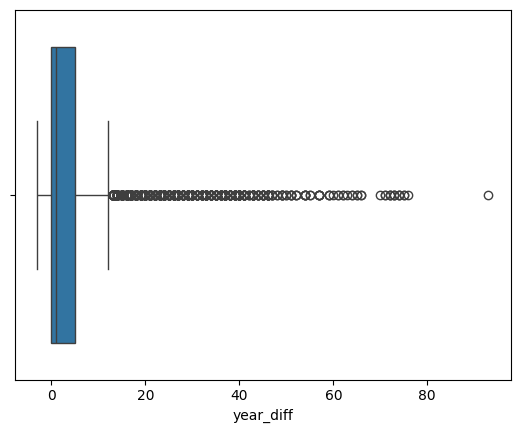

In [ ]:
plt.title('')
sns.boxplot(data = data, x = 'year_diff')
plt.show()

There are some outliers where title got added to netflix after 60 years of release, Its due to netflix platform was founded on 1997.





In [ ]:
np.percentile(data['year_diff'],q = [0,25,50,75,100])

array([-3.,  0.,  1.,  5., 93.])

Median value year diff is 1 year.

In [ ]:
print('Movies: '+str(data.loc[data.type == 'Movie']['year_diff'].median()),'TV Shows :'+str(data.loc[data.type == 'TV Show']['year_diff'].median()),sep='\n')

Movies: 2.0
TV Shows :0.0


From Boxplot plot analysis, median value of year diff is '1'.

If we consider seperately for Movies and TV shows,

1.   Most released Movies will be added to netflix after duration of 2 year.
2.   TV Shows will be added in same year of released


case 2: Based on assumption incorect release date or added date.

Lets normalize the data by removing the titles where it got added before its release.

In [ ]:
data.loc[data.year_diff < 0].head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,year_diff
1551,s1552,TV Show,Hilda,unknown_director,Bella Ramsey,United Kingdom,"December 14, 2020",2021,TV-Y7,2 Seasons,Kids' TV,"Fearless, free-spirited Hilda finds new friend...",2020,-1
1696,s1697,TV Show,Polly Pocket,unknown_director,Emily Tennant,Canada,"November 15, 2020",2021,TV-Y,2 Seasons,Kids' TV,After uncovering a magical locket that allows ...,2020,-1
2920,s2921,TV Show,Love Is Blind,unknown_director,Nick Lachey,United States,"February 13, 2020",2021,TV-MA,1 Season,Reality TV,Nick and Vanessa Lachey host this social exper...,2020,-1


removing the data where released year is higher than date_added titles

In [ ]:
c_data = data.drop(index = np.where(data.year_diff < 0)[0]).reset_index(drop=True)

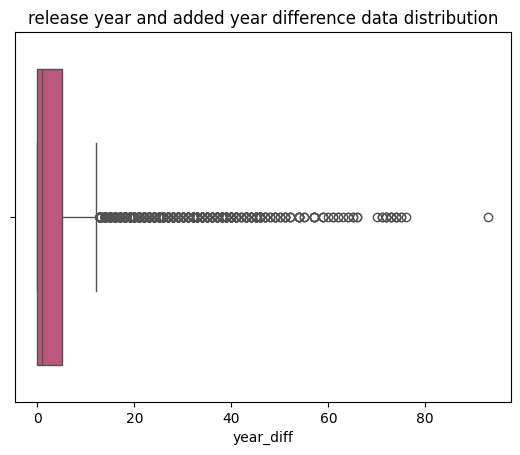

In [ ]:
plt.title('release year and added year difference data distribution')
sns.boxplot(data = c_data, x = 'year_diff',palette = 'plasma')
plt.show()

Median value year diff is 1 year.

From Boxplot plot analysis, median value of year diff is '1'.

Most relased titles will be added to netflix after duration of 1 year.

In [ ]:
np.percentile(c_data['year_diff'],q = [0,25,50,75,100])

array([ 0.,  0.,  1.,  5., 93.])

In [ ]:
print('Movie: '+str(c_data.loc[c_data.type == 'Movie']['year_diff'].median()),'TV Shows: '+str(c_data.loc[c_data.type == 'TV Show']['year_diff'].median()),sep='\n')

Movie: 2.0
TV Shows: 0.0


Analysis from both cases: Most titiles added in netflix after 2 year of their release.

Better time to add in netflix would be after 1 year of title release if we compare recent 10 years data.

Insights From Netflix Data:

1. December, July & November as the months when Netflix adds the most content in their platform. It shows about the strategic aproach of content release based on holiday season and summer season.

2. Our analysis shows Netflix had more movies than TV shows.

3. Rating Distribution:Netflix has more domination content on Mature Adults comparing to kids or PG-13 content.

4. Netflix focused on releasing on genres such as TV dramas and international TV shows, romantic and International shows or Movies.
5. Commonly used Words like action, Drama, family, and adventure were frequently found in Genre, capturing recurring themes in Netflix content.


Recommendations:

1. Netflix had more movies than TV shows. They should focus on TV shows where there are people who likes to watch TV Shows rather than short duration Movies.

2. Netflix plaform is more focused on Mature Adult content. If they have to grab other age category users they should release Kids and under 13 age content.
3. It has most number of international movies genre so need to give priority to other geners like horor,Fantasy, thrillers, Kids programs.

4. Netflix should advertise and focus more on countires which has low movies or TV shows count content.It will help expand in their business by improving the subcription count.
